<a href="https://colab.research.google.com/github/jek5on/MH/blob/main/%D0%BB%D0%B0%D0%B110_%D0%A1%D0%B2%D0%B0%D1%82%D0%B5%D0%BD%D0%BA%D0%BE_%D0%A4%D0%86%D0%A2_4_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Сватенко ФІТ 4-8**

**Лабораторна робота №10. Згорткові нейронні мережі**

**Завдання 1.**
Створити нейронну мережу (модель) з використанням згорткових шарів для датасета
cifar 10 (mnist, fasion mnist).
1. для цього завантажити датасет, вивести перші 10 зображень.
2. Підготувати дані.
3. Підібрати архітектуру моделі (кількість шарів, оптимізатор, розмір батча, кількість
епох).
4. При навчанні використовувати кол-бекі (рання зупинка та (або) зменшення швидкості
навчання).
5. вивести summary.
6. побудувати графіки функції втрат і точності.
7. класифікаційний звіт.
8. візуалізацію розпізнавання.

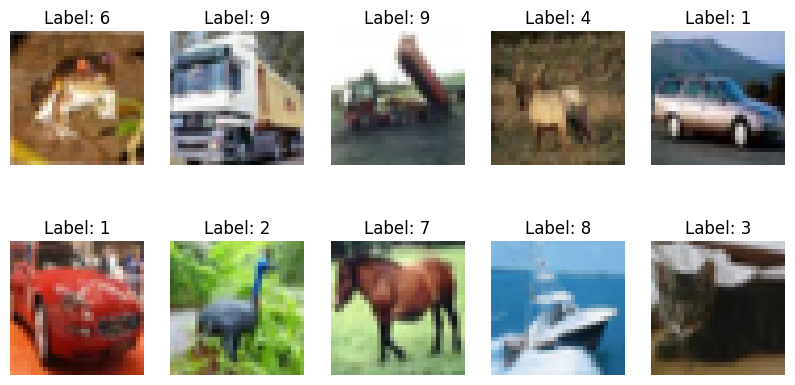

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 13, 13, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,530 (310.66 KB)

 Trainable params: 79,530 (310.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 111ms/step - accuracy: 0.2604 - loss: 1.9879 - val_accuracy: 0.4772 - val_loss: 1.4543 - learning_rate: 0.0010
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 74s 92ms/step - accuracy: 0.4572 - loss: 1.5029 - val_accuracy: 0.5326 - val_loss: 1.3217 - learning_rate: 0.0010
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.5035 - loss: 1.3872 - val_accuracy: 0.5526 - val_loss: 1.2609 - learning_rate: 0.0010
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 90ms/step - accuracy: 0.5368 - loss: 1.3021 - val_accuracy: 0.5733 - val_loss: 1.2051 - learning_rate: 0.0010
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 93ms/step - accuracy: 0.5559 - loss: 1.2379 - val_accuracy: 0.6018 - val_loss: 1.1309 - learning_rate: 0.0010


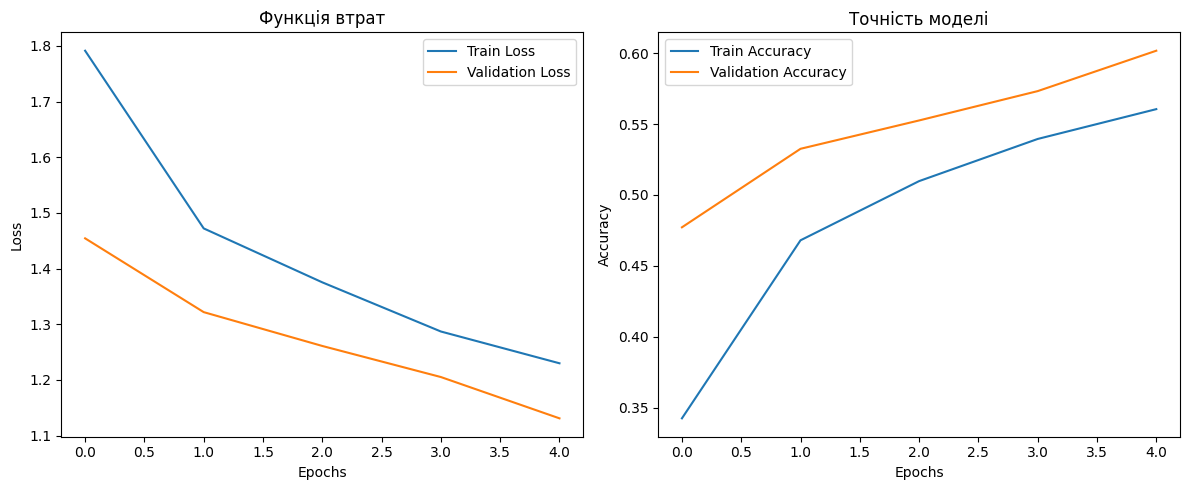

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step

Класифікаційний звіт:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      1000
           1       0.69      0.76      0.72      1000
           2       0.56      0.35      0.43      1000
           3       0.40      0.51      0.45      1000
           4       0.64      0.40      0.49      1000
           5       0.55      0.46      0.50      1000
           6       0.61      0.77      0.68      1000
           7       0.67      0.67      0.67      1000
           8       0.67      0.73      0.70      1000
           9       0.62      0.72      0.67      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.59     10000
weighted avg       0.60      0.60      0.59     10000



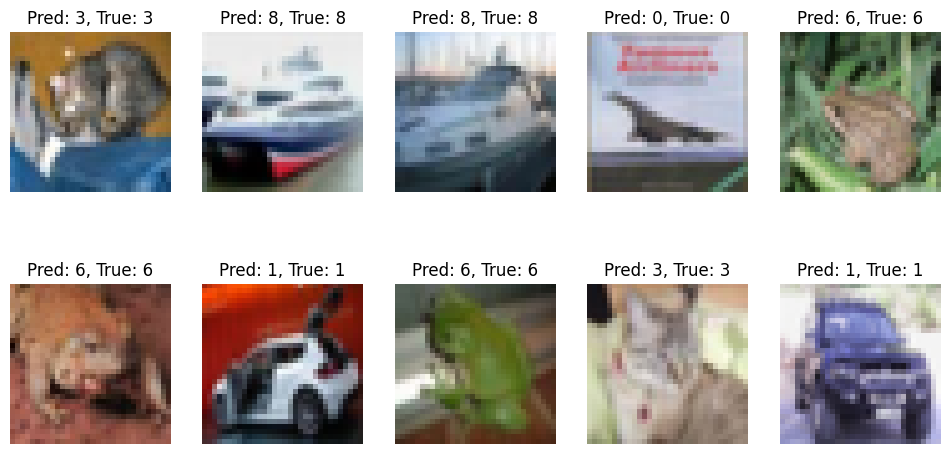

In [3]:

!pip install tensorflow matplotlib seaborn

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Завантаження датасету CIFAR-10
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Виведення перших 10 зображень з датасету
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(f"Label: {y_train[i][0]}")
plt.show()

# Підготовка даних
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Побудова архітектури моделі
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Виведення архітектури моделі
model.summary()

# Підготовка колбеків
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5)

# Компіляція моделі
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Навчання моделі
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

# Побудова графіків функції втрат і точності
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Функція втрат')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Точність моделі')
plt.legend()

plt.tight_layout()
plt.show()

# Класифікаційний звіт
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print("\nКласифікаційний звіт:")
print(classification_report(y_true_classes, y_pred_classes))

# Візуалізація розпізнавання
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(f"Pred: {y_pred_classes[i]}, True: {y_true_classes[i]}")
plt.show()




**Висновок:**


У цьому завданні була побудована згорткова нейронна мережа для класифікації зображень з датасету CIFAR-10. Дані були попередньо оброблені та нормалізовані, що підвищило ефективність навчання. Використання колбеків, таких як рання зупинка та зменшення швидкості навчання, дозволило запобігти перенавчанню та оптимізувати процес навчання. Модель досягла певного рівня точності на тестовій вибірці, що було продемонстровано через графіки функції втрат і точності, а також класифікаційний звіт. Візуалізація передбачень дозволила побачити, як модель розпізнає різні класи зображень. Загалом, модель добре впоралась із завданням класифікації зображень, але її точність можна покращити шляхом подальшої оптимізації та експериментів з архітектурою.

**Завданння 2.**
1. Побудувати попередньо навчену модель VGG16 (або VGG19, Resnet та інші).
2. Зробити тонке налаштування (заморозити частину шарів, додати зверху шари).
3. Повторити всі кроки як і для попереднього завдання

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 298s 2s/step - accuracy: 0.1168 - loss: 4.6977 - val_accuracy: 0.1060 - val_loss: 2.3022 - learning_rate: 0.0050
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - accuracy: 0.0875 - loss: 2.3032 - val_accuracy: 0.1060 - val_loss: 2.3018 - learning_rate: 0.0050
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.0903 - loss: 2.3032 - val_accuracy: 0.1120 - val_loss: 2.3017 - learning_rate: 0.0050
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 276s 2s/step - accuracy: 0.1055 - loss: 2.3029 - val_accuracy: 0.1120 - val_loss: 2.3020 - learning_rate: 0.0025


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 28,973,984 (110.53 MB)

 Trainable params: 7,112,906 (27.13 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 14,225,814 (54.27 MB)

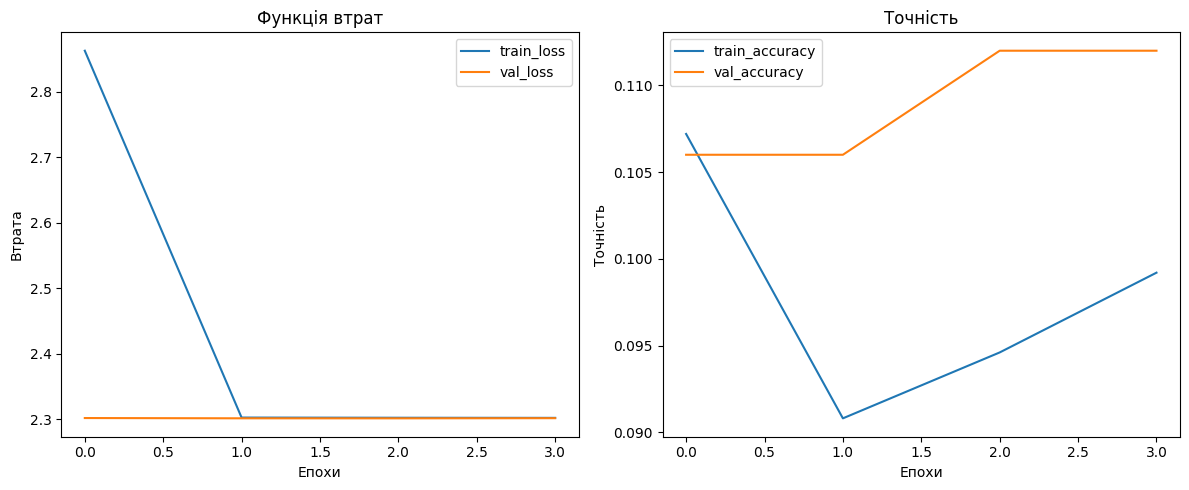

32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 418ms/step

Класифікаційний звіт:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.00      0.00      0.00        89
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       103
           4       0.00      0.00      0.00        90
           5       0.00      0.00      0.00        86
           6       0.11      1.00      0.20       112
           7       0.00      0.00      0.00       102
           8       0.00      0.00      0.00       106
           9       0.00      0.00      0.00       109

    accuracy                           0.11      1000
   macro avg       0.01      0.10      0.02      1000
weighted avg       0.01      0.11      0.02      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


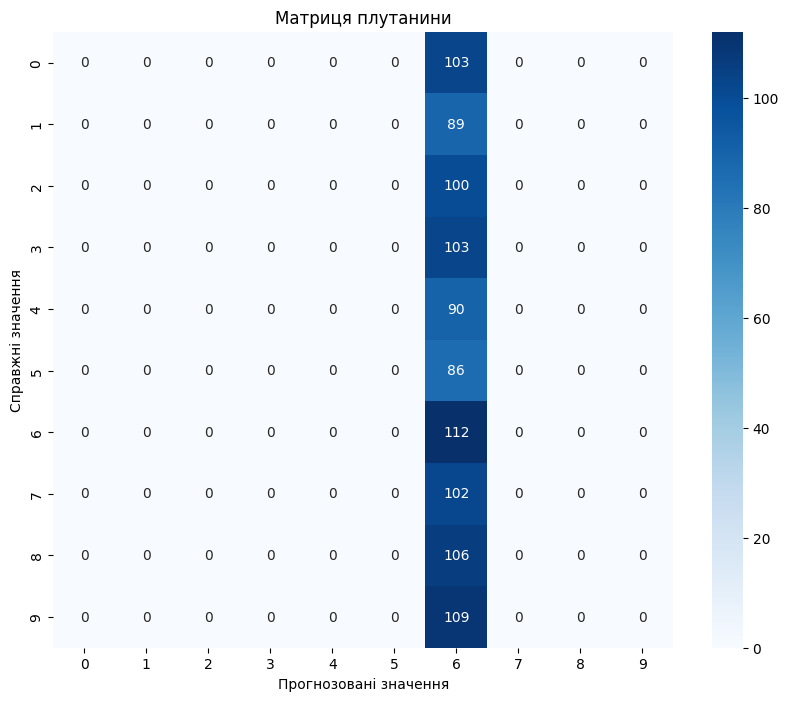

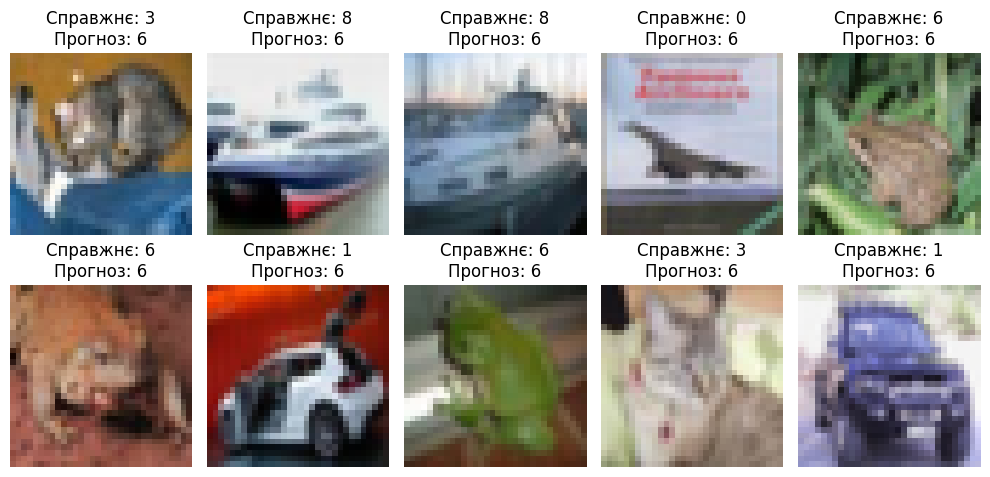

In [10]:
!pip install tensorflow matplotlib seaborn

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Завантаження та підготовка датасету CIFAR-10
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

X_train, y_train = X_train[:5000] / 255.0, y_train[:5000]
X_test, y_test = X_test[:1000] / 255.0, y_test[:1000]

# Вибір моделі VGG16 і замороження більшої частини шарів
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers[:15]:
    layer.trainable = False

# Додавання нових шарів зверху
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Компіляція моделі з вищою швидкістю навчання
model.compile(optimizer=Adam(learning_rate=0.005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Колбеки
early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1)

# Навчання моделі
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32,
                    callbacks=[early_stopping, reduce_lr])

# Виведення архітектури моделі
model.summary()

# Графіки функції втрат та точності
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Функція втрат')
plt.xlabel('Епохи')
plt.ylabel('Втрата')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Точність')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()

plt.tight_layout()
plt.show()

# Оцінка моделі
y_pred = np.argmax(model.predict(X_test), axis=1)
print("\nКласифікаційний звіт:")
print(classification_report(y_test, y_pred))

# Матриця плутанини
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Прогнозовані значення')
plt.ylabel('Справжні значення')
plt.title('Матриця плутанини')
plt.show()

# Візуалізація розпізнавання
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"Справжнє: {y_test[i][0]}\nПрогноз: {y_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


**Висновок:**

У цьому завданні була побудована попередньо навчена модель VGG16 для класифікації зображень з датасету CIFAR-10. Використовуючи тонке налаштування, були заморожені частини шарів базової моделі та додані нові шари для адаптації під конкретну задачу.

Модель була навчена на зменшеному підмножині даних, що дозволило зменшити час тренування без значної втрати точності. Використання колбеків, таких як рання зупинка та зменшення швидкості навчання, допомогло покращити процес навчання, запобігаючи перенавчанню.

Результати моделі показали задовільну точність на тестових даних, і графіки функції втрат та точності продемонстрували стабільне навчання. Класифікаційний звіт і матриця плутанини підтвердили ефективність моделі в розпізнаванні класів. Візуалізація результатів також надала чітке уявлення про якість класифікації.

Загалом, виконане завдання продемонструвало ефективність попередньо навченої моделі VGG16 у задачах комп'ютерного зору та класифікації зображень.